## Install Dependencies

In [3]:
#!pip install tensorflow opencv-python matplotlib

## Import Dependencies

In [30]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [9]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove Dodgy Images

In [17]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [55]:
data_dir = 'data'

In [56]:
image_exts = ['jpeg','jpg','bmp','png']

In [57]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))





Image not in ext list data\happy\-doing-breakfast-outdoors-in-a-traditional-countryside-friends-eating-snacks.jpg
Image not in ext list data\happy\-friends-hanging-out-together-outside-young-mix-raced-people-walking-hugging.jpg
Image not in ext list data\happy\20240386-group-happy-people-in-summer-outdoor.jpg
Image not in ext list data\happy\24561735-young-happy-people-having-fun-outside-in-summer.jpg
Image not in ext list data\happy\45657201-young-happy-people-walking-outdoors-drinking-beverages.jpg
Image not in ext list data\happy\66024288-group-of-friends-laughing-out-loud-outdoor-sharing-good-and-positive-mood.jpg
Image not in ext list data\happy\800px_COLOURBOX54515864.jpg
Image not in ext list data\happy\ancing-cheerfully-at-a-picnic-party-in-nature-young-people-have-fun-outdoors.jpg
Image not in ext list data\happy\anging-out-together-outside-young-men-and-women-walking-in-city-hugging-each.jpg
Image not in ext list data\happy\appy-young-people-having-a-rooftop-party-friends-lau

In [58]:
img = cv2.imread(os.path.join('data','happy','smile.woman_.jpg'))

In [59]:
img.shape

(3844, 5125, 3)

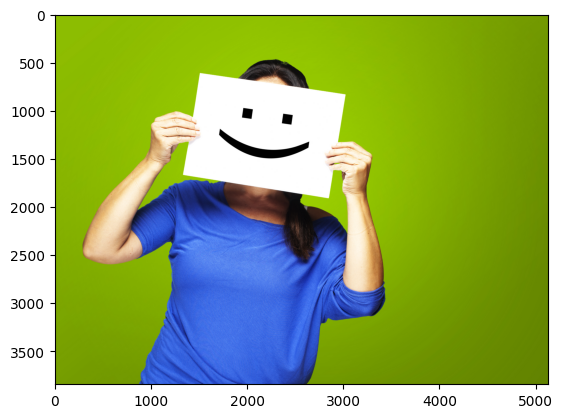

In [60]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Load Data

In [61]:
tf.data.Dataset??

In [62]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 526 files belonging to 2 classes.


In [63]:
data_iterator = data.as_numpy_iterator()

In [64]:
batch = data_iterator.next()

In [65]:
batch[0].shape

(32, 256, 256, 3)

In [66]:
batch[1]

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

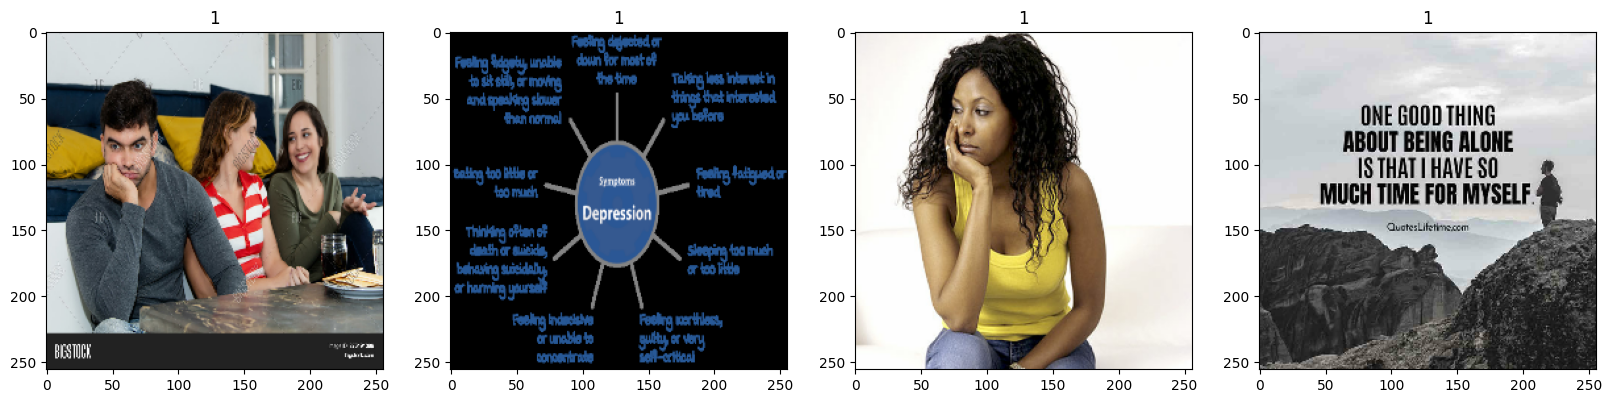

In [67]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessig Data - Scale Data & Split Data

In [68]:
#Scale Data
data = data.map(lambda x,y: (x/255, y))

In [69]:
data.as_numpy_iterator().next()[0].min(), data.as_numpy_iterator().next()[0].max()

(0.0, 1.0)

In [70]:
#Split Data
len(data)

17

In [73]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
train_size, val_size, test_size

(11, 4, 2)

In [74]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build Deep Learning Model

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [76]:
model = Sequential()

In [77]:
#
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train

In [80]:
logdir='logs'

In [81]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [82]:
hist = model.fit(train, epochs=20,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 35s 3s/step - loss: 0.7825 - accuracy: 0.5739 - val_loss: 0.6060 - val_accuracy: 0.7734
Epoch 2/20
11/11 [==============================] - 30s 2s/step - loss: 0.5392 - accuracy: 0.7557 - val_loss: 0.4896 - val_accuracy: 0.7188
Epoch 3/20
11/11 [==============================] - 30s 2s/step - loss: 0.5152 - accuracy: 0.7415 - val_loss: 0.7243 - val_accuracy: 0.5469
Epoch 4/20
11/11 [==============================] - 30s 2s/step - loss: 0.4492 - accuracy: 0.8125 - val_loss: 0.4715 - val_accuracy: 0.7891
Epoch 5/20
11/11 [==============================] - 48s 4s/step - loss: 0.3375 - accuracy: 0.8636 - val_loss: 0.3209 - val_accuracy: 0.8828
Epoch 6/20
11/11 [==============================] - 39s 3s/step - loss: 0.2641 - accuracy: 0.9006 - val_loss: 0.2725 - val_accuracy: 0.8672
Epoch 7/20
11/11 [==============================] - 38s 3s/step - loss: 0.2448 - accuracy: 0.9006 - val_loss: 0.2370 - val_accuracy: 0.8828
Epoch 8/20
11/11 [==

## Plot Performance

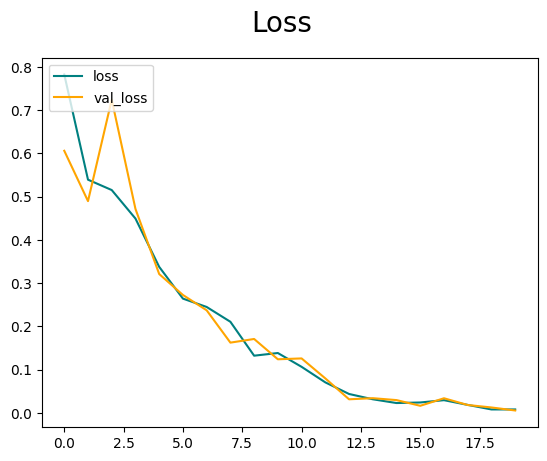

In [84]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

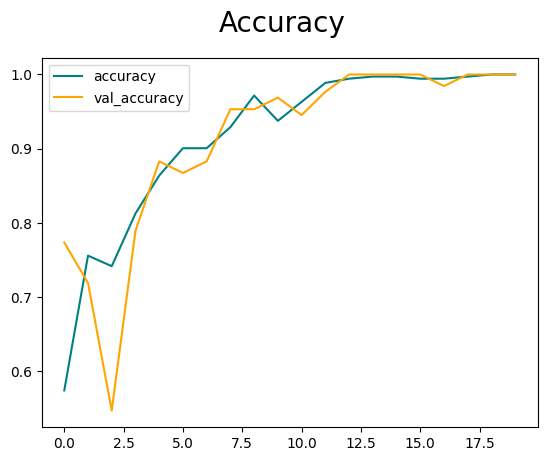

In [85]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluate Performance 

In [86]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [87]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [88]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 379ms/step


In [93]:
print(f'Precision: {pre.result().numpy()}, \nRecall: {re.result().numpy()}, \nBinary Accuracy: {acc.result().numpy()}')

Precision: 1.0, 
Recall: 1.0, 
Binary Accuracy: 1.0


## Testing 

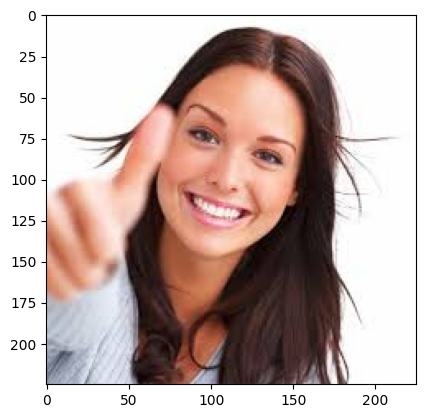

In [115]:
img = cv2.imread('happytest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

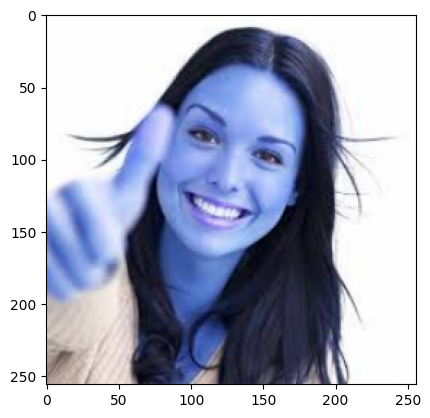

In [116]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [117]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 46ms/step


In [118]:
yhat

array([[0.99948764]], dtype=float32)

In [119]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


## Save the Model

In [120]:
from tensorflow.keras.models import load_model

In [121]:
model.save(os.path.join('models','cnnimageclassifier.h5'))

In [122]:
new_model = load_model(os.path.join('models','cnnimageclassifier.h5'))

In [124]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 130ms/step


In [125]:
if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
